[Execute this notebook using binder](https://mybinder.org/v2/gh/VivianePons/public-notebooks/master)

# Permutohedron and Associahedron: some posets and polytopes from combinatorics

In [0]:
# Some hack that I need later

from sage.misc.latex import _Latex_prefs
from sage.misc.latex import png
from sage.misc.temporary_file import tmp_filename
import os
from IPython.display import Image
from IPython.display import display

def viewLatex(objects):
    engine = _Latex_prefs._option["engine"]
    if type(objects) != list:
        objects = [objects]
    L = []
    for o in objects:
        file_name = tmp_filename() + ".png"
        png(o, file_name, debug = False, engine = engine)
        L.append(Image(filename = file_name))
    return display(*L)

## Permutations and the weak order

In [3]:
P3 = list(Permutations(3))
P3

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]

In [4]:
p = P3[0]
p

[1, 2, 3]

In [5]:
p.permutohedron_lequal(P3[4], side = "left")

True

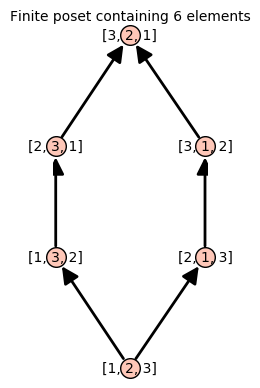

In [6]:
W3 = Poset((P3, lambda x,y: x.permutohedron_lequal(y, side="left")))
W3

In [7]:
P4 = list(Permutations(4))
P4

[[1, 2, 3, 4],
 [1, 2, 4, 3],
 [1, 3, 2, 4],
 [1, 3, 4, 2],
 [1, 4, 2, 3],
 [1, 4, 3, 2],
 [2, 1, 3, 4],
 [2, 1, 4, 3],
 [2, 3, 1, 4],
 [2, 3, 4, 1],
 [2, 4, 1, 3],
 [2, 4, 3, 1],
 [3, 1, 2, 4],
 [3, 1, 4, 2],
 [3, 2, 1, 4],
 [3, 2, 4, 1],
 [3, 4, 1, 2],
 [3, 4, 2, 1],
 [4, 1, 2, 3],
 [4, 1, 3, 2],
 [4, 2, 1, 3],
 [4, 2, 3, 1],
 [4, 3, 1, 2],
 [4, 3, 2, 1]]

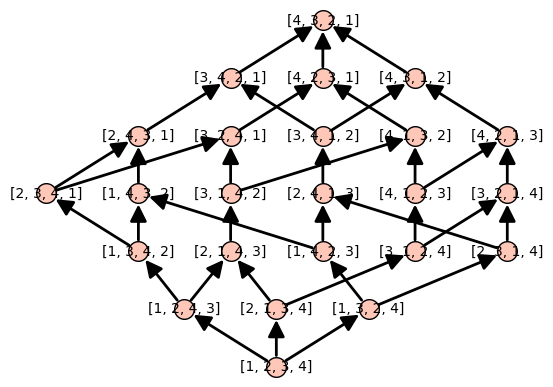

In [8]:
W4 = Poset((P4, lambda x,y: x.permutohedron_lequal(y, side="left")))
plot(W4)

In [9]:
Permu3 = Polyhedron(P3)
Permu3

A 2-dimensional polyhedron in ZZ^3 defined as the convex hull of 6 vertices (use the .plot() method to plot)

In [10]:
Permu3.plot()

Graphics3d Object

In [11]:
Permu4 = Polyhedron(P4)
Permu4

A 3-dimensional polyhedron in ZZ^4 defined as the convex hull of 24 vertices (use the .plot() method to plot)

In [12]:
Permu4.plot()

Graphics3d Object

## Binary Trees

In [13]:
BT8 = BinaryTrees(8)

In [14]:
bt = BT8.random_element()
bt

[[[[[., .], [., .]], .], .], [[., .], .]]

In [15]:
bt.plot()# ca ne marc

AttributeError: 'BinaryTrees_all_with_category.element_class' object has no attribute 'plot'

In [16]:
print(latex(bt))

{ \newcommand{\nodea}{\node[draw,circle] (a) {$$}
;}\newcommand{\nodeb}{\node[draw,circle] (b) {$$}
;}\newcommand{\nodec}{\node[draw,circle] (c) {$$}
;}\newcommand{\noded}{\node[draw,circle] (d) {$$}
;}\newcommand{\nodee}{\node[draw,circle] (e) {$$}
;}\newcommand{\nodef}{\node[draw,circle] (f) {$$}
;}\newcommand{\nodeg}{\node[draw,circle] (g) {$$}
;}\newcommand{\nodeh}{\node[draw,circle] (h) {$$}
;}\begin{tikzpicture}[auto]
\matrix[column sep=.3cm, row sep=.3cm,ampersand replacement=\&]{
         \&         \&         \&         \&         \&         \&         \& \nodea  \&         \&         \&         \\ 
         \&         \&         \&         \&         \& \nodeb  \&         \&         \&         \& \nodeg  \&         \\ 
         \&         \&         \& \nodec  \&         \&         \&         \&         \& \nodeh  \&         \&         \\ 
         \& \noded  \&         \&         \&         \&         \&         \&         \&         \&         \&         \\ 
 \nodee  \&    

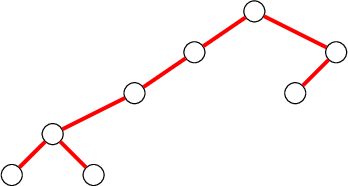

In [17]:
viewLatex(bt) # hors notebook, view(bt) fonctionne

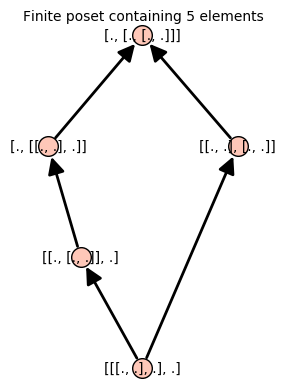

In [18]:
BT3 = list(BinaryTrees(3))
Tam3 = Poset((BT3, lambda x,y: x.tamari_lequal(y)))
Tam3

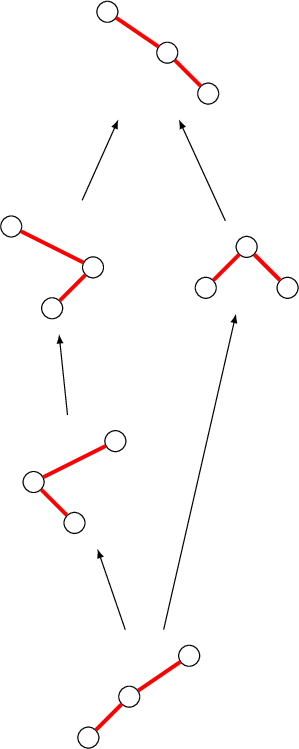

In [19]:
viewLatex(Tam3)

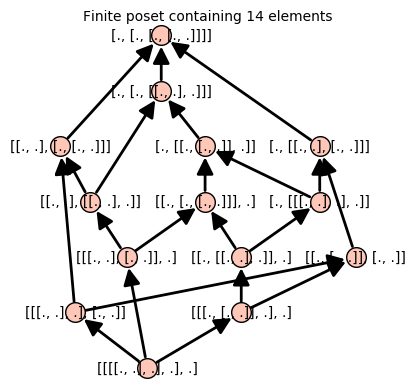

In [20]:
BT4 = list(BinaryTrees(4))
Tam4 = Poset((BT4, lambda x,y: x.tamari_lequal(y)))
Tam4

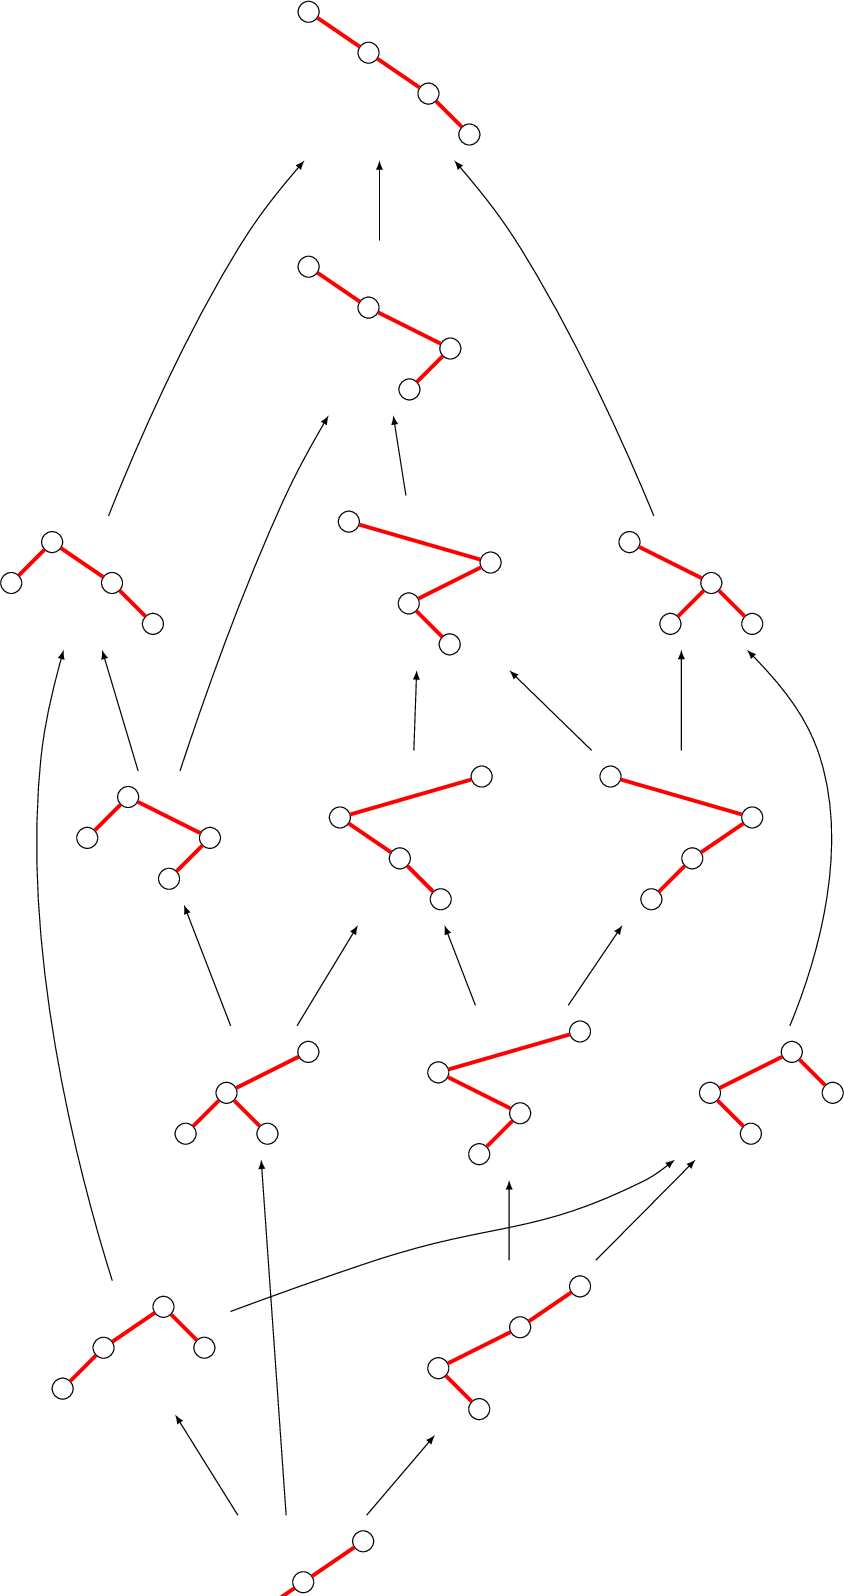

In [21]:
viewLatex(Tam4)

In [22]:
def numberOfLeaves(bt):
    if bt.node_number() == 0:
        return 1
    return numberOfLeaves(bt[0]) + numberOfLeaves(bt[1])

def LodayCoordinatesGen(bt):
    if bt.node_number() == 0:
        return
    yield from LodayCoordinates(bt[0])
    yield numberOfLeaves(bt[0])*numberOfLeaves(bt[1])
    yield from LodayCoordinates(bt[1])

def LodayCoordinates(bt):
    return tuple(LodayCoordinatesGen(bt))

In [23]:
LodayCoordinates(bt)

(1, 4, 1, 4, 5, 18, 1, 2)

In [24]:
[LodayCoordinates(bt) for bt in BT3]

[(3, 2, 1), (3, 1, 2), (1, 4, 1), (2, 1, 3), (1, 2, 3)]

In [25]:
Asso3 = Polyhedron([LodayCoordinates(bt) for bt in BT3])
Asso3

A 2-dimensional polyhedron in ZZ^3 defined as the convex hull of 5 vertices (use the .plot() method to plot)

In [26]:
Asso3.plot()

Graphics3d Object

In [27]:
Asso4 = Polyhedron([LodayCoordinates(bt) for bt in BT4])
Asso4

A 3-dimensional polyhedron in ZZ^4 defined as the convex hull of 14 vertices (use the .plot() method to plot)

In [28]:
Asso4.plot()

Graphics3d Object

In [29]:
Permu3.plot() + Asso3.plot()

Graphics3d Object

In [30]:
matrix = Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1], [-ZZ(1)/3, -ZZ(1)/3, -ZZ(1)/3]])
proj = lambda x: list(Matrix(x)*matrix)[0]
Permu4Proj = Permu4.projection(proj)
Asso4Proj = Asso4.projection(proj)

In [31]:
Permu4Proj.plot() + Asso4Proj.plot()

Graphics3d Object

In [32]:
Permu3.inequalities()

(An inequality (0, -1, -1) x + 5 >= 0,
 An inequality (0, 0, -1) x + 3 >= 0,
 An inequality (0, -1, 0) x + 3 >= 0,
 An inequality (0, 1, 0) x - 1 >= 0,
 An inequality (0, 1, 1) x - 3 >= 0,
 An inequality (0, 0, 1) x - 1 >= 0)

In [33]:
Permu3.equations()

(An equation (1, 1, 1) x - 6 == 0,)

In [34]:
Asso3.inequalities()

(An inequality (0, -1, -1) x + 5 >= 0,
 An inequality (0, 0, -1) x + 3 >= 0,
 An inequality (0, 1, 0) x - 1 >= 0,
 An inequality (0, 1, 1) x - 3 >= 0,
 An inequality (0, 0, 1) x - 1 >= 0)

In [35]:
all(ieq in Permu3.inequalities() for ieq in Asso3.inequalities())

True

In [36]:
len(Permu4.inequalities())

14

In [37]:
len(Asso4.inequalities())

9

In [38]:
all(ieq in Permu4.inequalities() for ieq in Asso4.inequalities())

True

## Permutrees

[arXiv:1606.09643](https://arxiv.org/abs/1606.09643)

an example

In [40]:
MyVertices = [[3, 2, 4, 1],
 [1, 2, 4, 3],
 [3, 2, 1, 4],
 [2, 1, 4, 3],
 [4, 3, 2, 1],
 [4, 3, 1, 2],
 [1, 4, 1, 4],
 [1, 6, 1, 2],
 [4, 2, 3, 1],
 [1, 6, 2, 1],
 [4, 2, 1, 3],
 [4, 1, 2, 3],
 [4, 1, 3, 2],
 [2, 1, 3, 4],
 [3, 1, 4, 2],
 [1, 4, 4, 1],
 [1, 2, 3, 4],
 [3, 1, 2, 4]]

In [41]:
P = Polyhedron(MyVertices)
P

A 3-dimensional polyhedron in ZZ^4 defined as the convex hull of 18 vertices (use the .plot() method to plot)

In [42]:
P.plot()

Graphics3d Object

In [43]:
matrix = Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1], [-ZZ(1)/3, -ZZ(1)/3, -ZZ(1)/3]])
proj = lambda x: list(Matrix(x)*matrix)[0]
PProj = P.projection(proj)

In [44]:
Permu4Proj.plot() + PProj.plot()

Graphics3d Object

In [45]:
Permu4Proj.plot() + PProj.plot() + Asso4Proj.plot()

Graphics3d Object

In [46]:
print(len(Permu4.inequalities()))
print(len(P.inequalities()))
print(len(Asso4.inequalities()))

14
11
9


In [0]:
all(ieq in Permu4.inequalities() for ieq in P.inequalities())

In [0]:
all(ieq in P.inequalities() for ieq in Asso4.inequalities())

**to finish...**

Some beautiful decompositions of permutohedron and 

 * [A nice illustration](https://www.lri.fr/~pons/static/spermutahedron/s0333-animate.html)
 * [Another nice one](https://www.lri.fr/~pons/static/spermutahedron/s0333_both-animate.html)
 * [Many ones](https://www.lri.fr/~pons/static/spermutahedron/)

[My github Sage notebooks](https://github.com/VivianePons/public-notebooks)
